In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import PMTPosition as PMT
from tqdm import tqdm

In [2]:
GEM_width,  GEM_height = PMT.GetGEMsDim()
GEM_z_dist = PMT.GetGEMsZ()

DX = 0

# Standard Geometry
CAM_pos = np.array([[GEM_width/2, GEM_height/2 + GEM_height/3],
                    [GEM_width/2, GEM_height/2],
                    [GEM_width/2, GEM_height/2 - GEM_height/3]
                   ])

PMT_pos = np.array([[GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 + GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 + GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 + GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 + GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 - GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 - GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 - GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 - GEM_height/3-GEM_height/3/2],
                   ])

In [3]:
pos  = PMT.GenEventPosition(size = 10_000_000)
ints = PMT.GetIntegrals(PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos), energy = 5.9, LY = 8500.0)

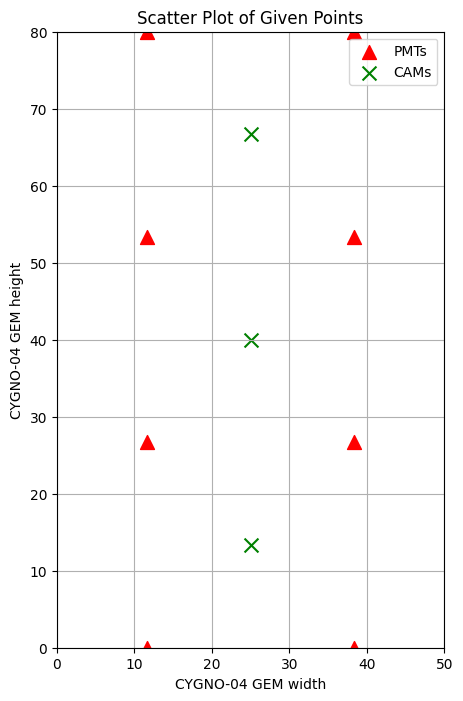

In [4]:
plt.figure(figsize=(5, 8))
#plt.scatter(pos[:, 0], pos[:, 1], color='blue', label=None)
plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)
plt.scatter(CAM_pos[:, 0], CAM_pos[:, 1], color='green', label='CAMs', marker='x', s=100)
plt.xlabel('CYGNO-04 GEM width')
plt.ylabel('CYGNO-04 GEM height')
plt.xlim(0,GEM_width)
plt.ylim(0,GEM_height)
plt.title('Scatter Plot of Given Points')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
summed = np.zeros(len(ints[:,0]))
for i in range(len(ints[0, :])):
    summed = summed + ints[:,i]

In [6]:
bins = [np.linspace(0., GEM_width,    int(GEM_width)*2+1),
        np.linspace(0., GEM_height,  int(GEM_height)*2+1)]

In [7]:
image = np.zeros((len(bins[0])-1, len(bins[1])-1))

In [8]:
for i in tqdm(range(len(image))):
    for j in range(len(image[0])):
        indices = np.where((pos[:,0]>bins[0][i])&(pos[:,0]<=bins[0][i+1])&(pos[:,1]>bins[1][j])&(pos[:,1]<=bins[1][j+1]))
        image[i][j] += np.sum(summed[indices])/len(summed[indices])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:37<00:00,  1.58s/it]


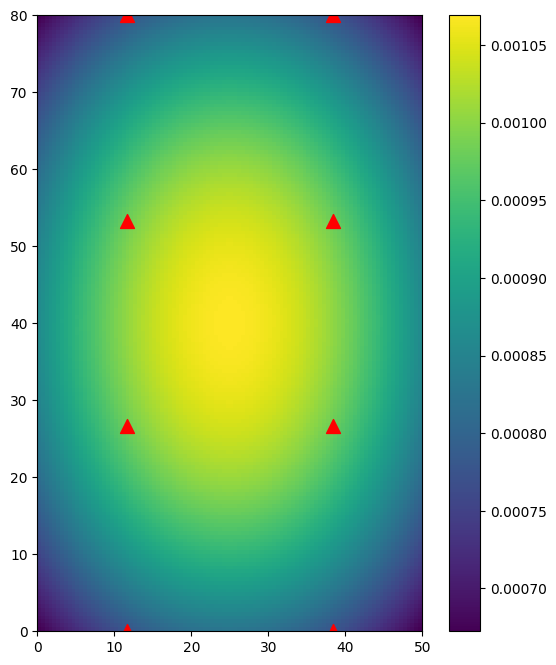

In [9]:
plt.figure(figsize=(7, 8))
plt.imshow(image.T, extent=[0,50, 0,80])
plt.colorbar()
plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)
plt.show()